# Profiling task

In [1]:
from hmmlearn.hmm import GaussianHMM
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import math
import random

## IP Addresses

### Infected hosts
    - 147.32.84.165
    - 147.32.84.191
    - 147.32.84.192
    - 147.32.84.193
    - 147.32.84.204
    - 147.32.84.205
    - 147.32.84.206
    - 147.32.84.207
    - 147.32.84.208
    - 147.32.84.209
        
### Normal hosts:
    - 147.32.84.170
    - 147.32.84.134
    - 147.32.84.164
    - 147.32.87.36
    - 147.32.80.9
    - 147.32.87.11


In [2]:
random.seed(0)
with open('discretized_data/all_discretized_protocol_bytes.pkl', 'rb') as f:
    data = pickle.load(f)
infected_ip = '147.32.84.165'
data[(data['src_ip']== infected_ip) | (data['dst_ip']== infected_ip)]
# data = data.set_index(data.date)

,date,duration,protocol,src_ip,src_port,dst_ip,dst_port,flags,tos,packets,bytes,flows,label,protocol_num,flags_num,bytes_num,encoded
19115,2011-08-18 10:37:58.448,0.000,UDP,147.32.84.165,1025,147.32.80.9,53,INT,0,1,64,1,Botnet,1,5,0,4.0
19116,2011-08-18 10:37:58.448,0.000,UDP,147.32.80.9,53,147.32.84.165,1025,INT,0,1,139,1,Botnet,1,5,0,4.0
19203,2011-08-18 10:38:00.695,0.000,UDP,147.32.84.165,1025,147.32.80.9,53,INT,0,1,87,1,Botnet,1,5,0,4.0
19205,2011-08-18 10:38:00.705,0.000,UDP,147.32.80.9,53,147.32.84.165,1025,INT,0,1,503,1,Botnet,1,5,1,5.0
19206,2011-08-18 10:38:00.706,0.043,TCP,147.32.84.165,1027,74.125.232.206,80,SRPA_,0,4,629,1,Botnet,0,15,1,1.0
19207,2011-08-18 10:38:00.714,0.032,TCP,74.125.232.206,80,147.32.84.165,1027,SPA_,0,3,253,1,Botnet,0,3,0,0.0
19227,2011-08-18 10:38:03.255,0.000,UDP,147.32.84.165,1025,147.32.80.9,53,INT,0,1,76,1,Botnet,1,5,0,4.0
19228,2011-08-18 10:38:03.266,0.000,UDP,147.32.80.9,53,147.32.84.165,1025,INT,0,1,403,1,Botnet,1,5,1,5.0
19229,2011-08-18 10:38:03.267,2.990,UDP,147.32.84.165,123,65.55.56.40,123,INT,0,2,180,1,Botnet,1,5,0,4.0
26082,2011-08-18 10:44:50.523,0.000,TCP,147.32.96.45,2097,147.32.84.165,21,S_,0,1,74,1,Botnet,0,10,0,0.0


In [3]:
# the infected host flows that we will profile
chosen = data[(data['src_ip'] == infected_ip) | (data['dst_ip'] == infected_ip)]
# rest of the hosts split between benign and malicious for testing purposes
normal =  ['147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36', '147.32.80.9', '147.32.87.11']
infected = ['147.32.84.191','147.32.84.192','147.32.84.193' , '147.32.84.204', '147.32.84.205',
            '147.32.84.206', '147.32.84.207','147.32.84.208','147.32.84.209']


In [4]:
def get_windows(data, window_size):
    size = len(data) - window_size
    # create sliding window data
    win_data = np.zeros((size,window_size),dtype=np.int32)
    for i in range(size):
        win_data[i] = np.array([flow for flow in data['encoded'].iloc[i:i+window_size]])
    return win_data

In [5]:
def find_optimal_params(chosen):
    max_ll = -math.inf
    optimal_win = 0
    optimal_components= 0
    for comp in range(2,7):
        for win in  range(2,11):
            win_data = get_windows(chosen, win)
            hmm = GaussianHMM(n_components=comp)
            hmm.fit(win_data)
            log_likelihood = hmm.decode(win_data)[0]
            if log_likelihood > max_ll:
                max_ll = log_likelihood
                optimal_win = win
                optimal_components = comp
            print('Window=%d ,Components=%d, Log-likelihood=%.3f' %(win,comp,log_likelihood))
    print('Optimal values: Window=%d, Components=%d' %(optimal_win, optimal_components))
    return optimal_win, optimal_components

In [6]:
# get the optimal window size and number of components for the HMM
win, components = find_optimal_params(chosen)

win_data = get_windows(chosen, win)

# learn a Gaussian Hidden Markov Model with 4 states from the infected host data
hmm = GaussianHMM(n_components=components)
hmm.fit(win_data)
# store the log-likelihood of the host that trained the model
log_likelihood = hmm.decode(win_data)[0]

Window=2 ,Components=2, Log-likelihood=-70661.158
Window=3 ,Components=2, Log-likelihood=-106066.236
Window=4 ,Components=2, Log-likelihood=-141602.953
Window=5 ,Components=2, Log-likelihood=-177269.743
Window=6 ,Components=2, Log-likelihood=-213051.453
Window=7 ,Components=2, Log-likelihood=-248944.150
Window=8 ,Components=2, Log-likelihood=-284921.137
Window=9 ,Components=2, Log-likelihood=-320992.482
Window=10 ,Components=2, Log-likelihood=-357148.612
Window=2 ,Components=3, Log-likelihood=126672.008
Window=3 ,Components=3, Log-likelihood=91282.962
Window=4 ,Components=3, Log-likelihood=55583.412
Window=5 ,Components=3, Log-likelihood=101126.963
Window=6 ,Components=3, Log-likelihood=-185942.864
Window=7 ,Components=3, Log-likelihood=104288.044
Window=8 ,Components=3, Log-likelihood=115321.129
Window=9 ,Components=3, Log-likelihood=-285806.853
Window=10 ,Components=3, Log-likelihood=-317883.384
Window=2 ,Components=4, Log-likelihood=293252.384
Window=3 ,Components=4, Log-likelihood=

In [7]:

hosts_log_likelihood = {}
# compute log-likelihood of data sequence of normal IPs
for ip in normal:
    # get the flows of that host only
    host_data = data[(data['src_ip'] == ip) | (data['dst_ip'] == ip)]
    size = len(host_data) - win
    # if host has enough flows for creating a window
    if size > 0:
        # create sliding windows sequences
        normal_data = get_windows(host_data, win)
        # get the log-likelihood of the sequential data
        hosts_log_likelihood[ip] = hmm.decode(normal_data)[0]
    else:
        hosts_log_likelihood[ip] = 0

# repeat procedure for all infected IPs
for ip in infected:
    # get the flows of that host only
    host_data = data[(data['src_ip'] == ip) | (data['dst_ip'] == ip)]
    size = len(host_data) - win
    # if host has enough flows for creating a window
    if size > 0:
        # create sliding windows sequences
        infected_data = get_windows(host_data, win)
        # get the log-likelihood of the sequential data
        hosts_log_likelihood[ip] = hmm.decode(infected_data)[0]
    else:
        hosts_log_likelihood[ip] = 0

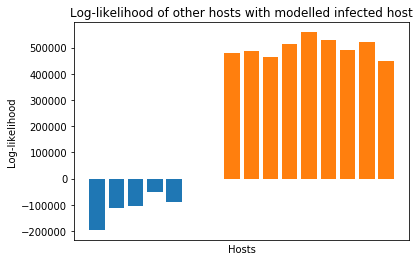

In [8]:
xticks = ['normal'+str(i) for i in range(1,7)] + ['infected'+str(i) for i in range(1,10)]
h = [v[1] for v in hosts_log_likelihood.items()]
plt.bar(list(range(6)), h[:6])
plt.bar(list(range(7,16)), h[6:])
plt.xlabel('Hosts')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood of other hosts with modelled infected host')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.savefig('log_likelihood.png',  bbox_inches='tight')

In [9]:
# evaluate results using the log-likelihood distance of hosts from the one who trained the model
TP = 0
TN = 0
FP = 0
FN = 0
positives = []
negatives = []

# 
dist = {}
for ip in hosts_log_likelihood.keys():
    # absolute log-likelihood distance
    dist[ip] = abs(hosts_log_likelihood[ip] - log_likelihood)
    # threshold is half log-likelihood
    if dist[ip] > log_likelihood / 2:
        negatives.append(ip)
    else:
        positives.append(ip)

# evaluate all potentially malicious hosts
for i in positives:
    if i in infected:
        TP += 1
    else:
        FP += 1

# evaluate all potentially benign hosts
for i in negatives:
    if i in normal:
        TN += 1
    else:
        FN += 1
if TP + FP == 0:
    precision = 0
else:
    precision = TP / (TP + FP)
recall = TP / (TP + FN)
accuracy = (TP + TN) / (TP + TN + FP + FN)
print('True Positives : {}'.format(TP))
print('False Positives : {}'.format(FP))
print('True Negatives : {}'.format(TN))
print('False Negatives : {}'.format(FN))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('Accuracy: {}'.format(accuracy))

True Positives : 9
False Positives : 0
True Negatives : 6
False Negatives : 0
Precision: 1.0
Recall: 1.0
Accuracy: 1.0
